In [53]:
from keras.datasets import fashion_mnist

In [54]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

In [55]:
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
import numpy as np

In [57]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


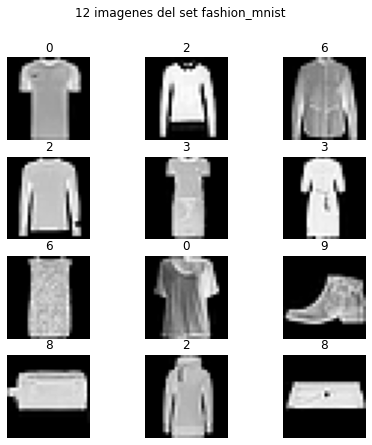

In [5]:
imagenes=np.random.randint(0,x_train.shape[0],12)
plt.figure(figsize=(7,7))
for i in range(len(imagenes)):
 img=x_train[imagenes[i],:,:]
 plt.subplot(4,3,i+1)
 plt.imshow(img, cmap='gray')
 plt.axis('off')
 plt.title(y_train[imagenes[i]])
plt.suptitle('12 imagenes del set fashion_mnist')
plt.show()

In [6]:
X_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
X_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )


In [7]:
print (X_train.shape)

(60000, 784)


In [8]:
X_train=X_train/255.0
X_test=X_test/255.0

In [9]:
from keras.utils import  np_utils

nclasses=10
y_train=np_utils.to_categorical(y_train,nclasses)
y_test=np_utils.to_categorical(y_test,nclasses)

#Entrenamiento

In [22]:
np.random.seed(1)
input_dim=X_train.shape[1]
output_dim=y_train.shape[1]

In [23]:
modelo=Sequential()
modelo.add(Dense(20,input_dim=input_dim,activation='relu'))
modelo.add(Dense(output_dim,activation='sigmoid'))

In [24]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [25]:
import tensorflow as tf
from tensorflow import keras
modelo.compile(tf.keras.optimizers.SGD(0.2),loss='categorical_crossentropy',
               metrics=['accuracy'])

In [48]:
modeloEntrenado=modelo.fit(X_train,y_train, epochs=85,batch_size=1024,verbose=2)

Epoch 1/85
59/59 - 0s - loss: 0.2214 - accuracy: 0.9196 - 392ms/epoch - 7ms/step
Epoch 2/85
59/59 - 0s - loss: 0.2299 - accuracy: 0.9166 - 390ms/epoch - 7ms/step
Epoch 3/85
59/59 - 0s - loss: 0.2227 - accuracy: 0.9183 - 379ms/epoch - 6ms/step
Epoch 4/85
59/59 - 0s - loss: 0.2225 - accuracy: 0.9195 - 411ms/epoch - 7ms/step
Epoch 5/85
59/59 - 0s - loss: 0.2177 - accuracy: 0.9221 - 397ms/epoch - 7ms/step
Epoch 6/85
59/59 - 0s - loss: 0.2228 - accuracy: 0.9190 - 416ms/epoch - 7ms/step
Epoch 7/85
59/59 - 0s - loss: 0.2164 - accuracy: 0.9215 - 443ms/epoch - 8ms/step
Epoch 8/85
59/59 - 0s - loss: 0.2214 - accuracy: 0.9196 - 394ms/epoch - 7ms/step
Epoch 9/85
59/59 - 0s - loss: 0.2248 - accuracy: 0.9175 - 411ms/epoch - 7ms/step
Epoch 10/85
59/59 - 0s - loss: 0.2195 - accuracy: 0.9200 - 403ms/epoch - 7ms/step
Epoch 11/85
59/59 - 0s - loss: 0.2168 - accuracy: 0.9208 - 403ms/epoch - 7ms/step
Epoch 12/85
59/59 - 0s - loss: 0.2236 - accuracy: 0.9190 - 403ms/epoch - 7ms/step
Epoch 13/85
59/59 - 0s - 

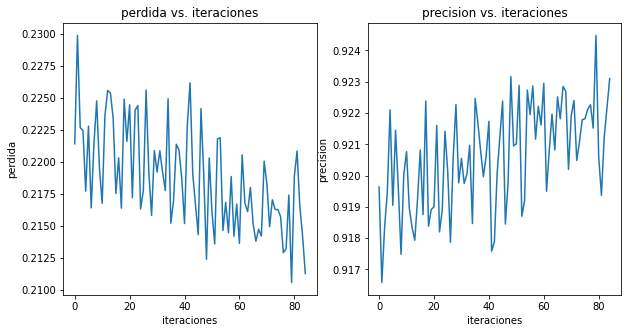

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(modeloEntrenado.history['loss'])
plt.title('perdida vs. iteraciones')
plt.ylabel('perdida')
plt.xlabel('iteraciones')

plt.subplot(1,2,2)
plt.plot(modeloEntrenado.history['accuracy'])
plt.title('precision vs. iteraciones')
plt.ylabel('precision')
plt.xlabel('iteraciones')
plt.show()


#Validacion

In [50]:
puntaje = modelo.evaluate(X_test,y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))


Precisión en el set de validación: 86.1%
